In [14]:
import pandas as pd
from os.path import join as opj
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from fg_shared import _fg_data

In [25]:
data_fn = opj(_fg_data, 'SEATRAC/TB_hackday_2023/data/foreman_etal/GSE227653_TPM_all.csv.gz')
meta_fn = opj(_fg_data, 'SEATRAC/TB_hackday_2023/data/foreman_etal/GSE227653_family.soft.csv')

meta = pd.read_csv(meta_fn)
cts = pd.read_csv(data_fn)

keep_cols = ['biosample', 'entrez_gene', 'gene_name_clc', 'Expression_value',
                  'TPM', 'RPKM', 'Exons', 'Gene_length', 'GeneID', 'Unique_gene_reads',
                  'Total_gene_reads', 'Transcripts_annotated', 'Detected_transcripts',
                  'Exon_length', 'Unique_exon_reads', 'Total_exon_reads']

In [27]:
print('Missing meta-data: ', [bs for bs in cts['biosample'].unique() if not bs in meta['biosample'].values])

Missing meta-data:  []


In [28]:
cts = pd.merge(cts[keep_cols], meta, how='left', on='biosample')

In [29]:
cts.groupby(['gene_name_clc', 'cell type'])['TPM'].agg(np.median).unstack('cell type').sort_values(by='CD8 granuloma T cell', ascending=False).head(20)

cell type,CD4 granuloma T cell,CD8 granuloma T cell
gene_name_clc,,
TMSB4X,39064.602288,40243.645444
B2M,35707.925974,39849.508423
LOC100428865,16957.127977,14862.180874
ACTB,13730.308937,12388.851575
LOC100499503,7563.260004,10392.125002
CD52,6942.708946,7412.967880
MAMU-A,6231.649363,7364.839797
IFITM1,8260.204194,5917.877318
GZMB,2133.522528,5744.277471


<AxesSubplot:xlabel='cell type', ylabel='TPM'>

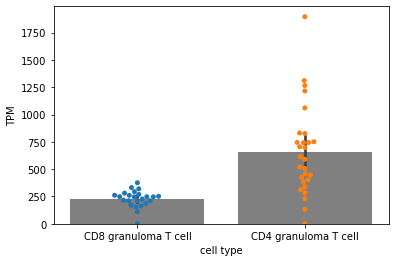

In [9]:
sns.barplot(x='cell type', y='TPM', data=cts.loc[cts['gene_name_clc'] == 'IFNG'], facecolor='gray')
sns.swarmplot(x='cell type', y='TPM', data=cts.loc[cts['gene_name_clc'] == 'IFNG'], dodge=True)

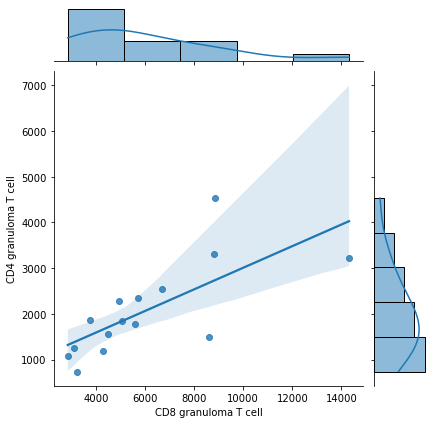

In [35]:
plot_df = cts.loc[cts['gene_name_clc'] == 'GZMB'].set_index(['subjid', 'granuloma', 'cell type'])['TPM'].unstack('cell type').dropna()
"""Not all granulomas have CD4 and CD8 T cells sequenced"""
plot_df = plot_df.dropna()

sns.jointplot(x='CD8 granuloma T cell', y='CD4 granuloma T cell', data=plot_df, kind='reg')